In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
stock_data =pd.read_csv("ITC.csv", parse_dates=['Date'])
stock_data.shape
# stock_data.head()

(325, 7)

In [39]:
# print(stock_data.isna().any(axis = 1)==True)
missing = stock_data[stock_data.isnull().any(axis = 1)]
stock_data = stock_data.dropna(axis = 0)
stock_data.reset_index(drop = True)
# print(stock_data.shape)
# print(stock_data.isna().sum())
# stock_data = stock_data.iloc[6000:6750,:-1]
# stock_data.head()
# stock_data.shape

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-15,38.859135,39.730003,36.906399,39.250534,39.250534,120291372
1,2021-12-16,39.240170,39.588623,38.300259,38.365852,38.365852,86864718
2,2021-12-17,38.380112,38.697403,36.058231,37.548019,37.548019,104962261
3,2021-12-18,37.567436,40.284611,37.330227,39.897789,39.897789,110481936
4,2021-12-19,39.911556,41.078522,39.493916,39.754658,39.754658,88118570
5,2021-12-20,39.744755,40.674320,38.502155,40.527096,40.527096,126430007
6,2021-12-21,40.534397,42.619316,40.490570,41.986320,41.986320,116765919
7,2021-12-22,41.979218,42.569759,41.120129,41.356663,41.356663,108300522
8,2021-12-23,41.353004,43.438702,40.823124,43.082020,43.082020,106057012
9,2021-12-24,43.096912,43.647491,42.331963,42.707603,42.707603,114811105


In [40]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

Normalizing the data using Min_Max_Scalar

In [41]:
X1 = np.array(stock_data['Open']) 
y1 = np.array(stock_data['Close']) 
# print(type(X))
X1 = X1.reshape(-1,1)
y1 = y1.reshape(-1,1)
scalar.fit(X1)
# print(X1.max())
# print(scalar.data_max_)
X = scalar.transform(X1)
scalar.fit(y1)
y = scalar.transform(y1)
# print(y1.max())
# print(scalar.data_max_)
# print(y1)
# print(y)


Linear Regression Model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Creating Training DataSet and Test DataSet

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)


In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict_train = lin_reg.predict(X_train)
y_predict = lin_reg.predict(X_test)
print(f"error in linear regression model in training dataset ==> {mean_squared_error(y_train, y_predict_train)}")
print(f"error in linear regression model in testing dataset==> {mean_squared_error(y_test, y_predict)}")

error in linear regression model in training dataset ==> 0.0023879341103742705
error in linear regression model in testing dataset==> 0.0015624037985134155


Visualisation


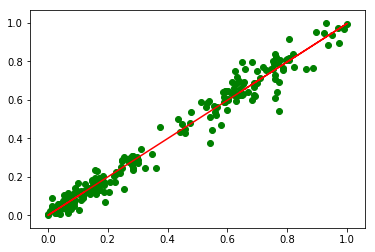

In [45]:
plt.scatter(X_train, y_train, color = 'green', marker='o')
plt.plot(X_train, lin_reg.predict(X_train), color = 'red')

In [46]:
b = 22.0
a = np.array([[22.0]])
a[:, np.newaxis]
a.reshape(-1,1)
a.shape


(1, 1)

In [47]:
scalar.fit(y1)
a = scalar.transform(a)
a

array([[-0.01393126]])

In [48]:
ys = lin_reg.predict(a)
y1.min()

22.411673999999998

In [49]:
yp =  ys *(y1.max() - y1.max()) +y1.min()
yp

array([[22.411674]])